In [1]:
import pandas as pd
import numpy as np

import requests
import geojson
import geopandas as gpd
from shapely.geometry import Point
import difflib

import string

from github import Github
from datetime import datetime

%matplotlib inline

### Load geojson data

In [2]:
url = 'https://raw.githubusercontent.com/CASA-DV-Group3/AirQuality-0/lyu/assets/data/stationData/STATIONdata2010.geojson'
data = requests.get(url)
data = geojson.loads(data.text)
data

{"features": [{"geometry": {"coordinates": [35.8354645, 50.9959656], "type": "Point"}, "properties": {"aqi": 22, "co": 36, "id": 10582, "no2": -1, "o3": 50, "pm10": 22, "pm25": -1, "so2": 80, "station": "Doe Unviversity, Karaj, Alborz, Iran (\u0627\u0644\u0628\u0631\u0632 \u06a9\u0631\u062c \u062f\u0627\u0646\u0634\u06af\u0627\u0647 \u0645\u062d\u06cc\u0637 \u0632\u06cc\u0633\u062a \u06a9\u0631\u062c, Iran)", "time": "2019-05-19 03:00:00"}, "type": "Feature"}, {"geometry": {"coordinates": [55.798813, -4.058363], "type": "Point"}, "properties": {"aqi": "-", "co": -1, "id": 9584, "no2": 10.6, "o3": 26, "pm10": 1, "pm25": 5, "so2": 3.6, "station": "South Lanarkshire Raith Interchange 2, United Kingdom", "time": "2019-05-19 03:00:00"}, "type": "Feature"}, {"geometry": {"coordinates": [55.974594, -3.161455], "type": "Point"}, "properties": {"aqi": 9, "co": 4, "id": 5986, "no2": 3.7, "o3": 18.7, "pm10": 7, "pm25": 9, "so2": 4.1, "station": "Edinburgh Salamander St, United Kingdom", "time": "

In [3]:
len(data.features)

8976

In [4]:
geoDF = gpd.read_file(url)
geoDF

id                                            station  \
0     10582  Doe Unviversity, Karaj, Alborz, Iran (البرز کر...   
1      9584  South Lanarkshire Raith Interchange 2, United ...   
2      5986            Edinburgh Salamander St, United Kingdom   
3        63                     Eisenhower Park, New York, USA   
4      5990                      Falkirk Haggs, United Kingdom   
5      5983             Edinburgh Glasgow Road, United Kingdom   
6     11605  Karimi, Mashhad, Khorasan  Razavi, Iran (خراسا...   
7      5989             Falkirk Grangemouth MC, United Kingdom   
8      5985         Edinburgh Queensferry Road, United Kingdom   
9     10648  Rigan, rigan, Kerman, Iran (كرمان شهرستان ریگا...   
10    10580  Eshtehard, Eshtehard, Alborz, Iran (البرز اشته...   
11     5309                                 Moscow, Idaho, USA   
12     5315                                 Salmon, Idaho, USA   
13     8312                              Juliaetta, Idaho, USA   
14     5996          Glasgow Abercromby Street, United Kingdom   
15     5991         Falkirk West Bridge Street, United Kingdom   
16     3390  London Hillingdon Harmondsworth Os, United Kin...   
17     6340                   Edinburgh Currie, United Kingdom   
18     6371                      Vittel, Basses Vosges, France   
19    11251  Karaj(metro), Karaj, Alborz, Iran (البرز کرج م...   
20    11252  Farhangsara, Karaj, Alborz, Iran (البرز کرج فر...   
21     6339  East Lothian Musselburgh N High St, United Kin...   
22     8924   V Glamorgan Windsor Road Penarth, United Kingdom   
23     5269                                Pahala, Hawaii, USA   
24      140              Beacon Hill, Seattle, Washington, USA   
25     8310                             Cottonwood, Idaho, USA   
26     5272                                 Kihei, Hawaii, USA   
27    11645  Samazghand, Mashhad, Khorasan  Razavi, Iran (خ...   
28    11604  Mofateh, Mashhad, Khorasan  Razavi, Iran (خراس...   
29    11603  North Khayam, Mashhad, Khorasan  Razavi, Iran ...   
...     ...                                                ...   
8946  10722                      Riverina LLS Wagga, Australia   
8947  11528  Nakamuraminami, Tsuchiura-shi, Ibaraki-ken, Ja...   
8948  10720                      Murray LLS Kyalite, Australia   
8949  11487                  Hwacheongun, Gangwon, South Korea   
8950  11486                Jeongseon-eup, Gangwon, South Korea   
8951  10721                        Riverina LLS Hay, Australia   
8952  11491                   Yanggu-eup, Gangwon, South Korea   
8953  11489                    Taebaeksi, Gangwon, South Korea   
8954  11485                 Yeongwol-eup, Gangwon, South Korea   
8955  11492                  Yangyanggun, Gangwon, South Korea   
8956  11484               Janghowon-eup, Gyeonggi, South Korea   
8957  11493        Sokchosi( Geumhodong), Gangwon, South Korea   
8958  10719                  Central West LLS Dubbo, Australia   
8959   8521                     Wairarapa College, New Zealand   
8960   9098                              Rangiora, New Zealand   
8961   9100                             Geraldine, New Zealand   
8962   9095                             St Albans, New Zealand   
8963   9103                       Waimate Kennedy, New Zealand   
8964   8522                            Birch Lane, New Zealand   
8965   8520             Upper Hutt At Savage Park, New Zealand   
8966   8524                        Chanel College, New Zealand   
8967   9096                              Woolston, New Zealand   
8968   9097                               Kaiapoi, New Zealand   
8969   9101                   Timaru Anzac Square, New Zealand   
8970   8525                             Willis St, New Zealand   
8971   9304                    Takapuna, Auckland, New Zealand   
8972   9303                     Penrose, Auckland, New Zealand   
8973   9301                   Glen Eden, Auckland, New Zealand   
8974   9302                   Patumahoe, Auckland

### Flip the order of coordinates: [lat,lng] -> [lng,lat]

In [5]:
old_point = data.features[0].geometry
old_point

{"coordinates": [35.8354645, 50.9959656], "type": "Point"}

In [6]:
new_point = geojson.utils.map_tuples(lambda tp: (tp[1], tp[0]), old_point)
new_point

{'type': 'Point', 'coordinates': (50.9959656, 35.8354645)}

In [7]:
for i in range(geoDF.shape[0]):
    try:
        old_coords = data.features[i].geometry['coordinates']
        geoDF.loc[i,'geometry'] = Point(old_coords[1],old_coords[0])
    except Exception as e:
        print(e)
        geoDF.loc[i,'geometry'] = np.nan
geoDF

id                                            station  \
0     10582  Doe Unviversity, Karaj, Alborz, Iran (البرز کر...   
1      9584  South Lanarkshire Raith Interchange 2, United ...   
2      5986            Edinburgh Salamander St, United Kingdom   
3        63                     Eisenhower Park, New York, USA   
4      5990                      Falkirk Haggs, United Kingdom   
5      5983             Edinburgh Glasgow Road, United Kingdom   
6     11605  Karimi, Mashhad, Khorasan  Razavi, Iran (خراسا...   
7      5989             Falkirk Grangemouth MC, United Kingdom   
8      5985         Edinburgh Queensferry Road, United Kingdom   
9     10648  Rigan, rigan, Kerman, Iran (كرمان شهرستان ریگا...   
10    10580  Eshtehard, Eshtehard, Alborz, Iran (البرز اشته...   
11     5309                                 Moscow, Idaho, USA   
12     5315                                 Salmon, Idaho, USA   
13     8312                              Juliaetta, Idaho, USA   
14     5996          Glasgow Abercromby Street, United Kingdom   
15     5991         Falkirk West Bridge Street, United Kingdom   
16     3390  London Hillingdon Harmondsworth Os, United Kin...   
17     6340                   Edinburgh Currie, United Kingdom   
18     6371                      Vittel, Basses Vosges, France   
19    11251  Karaj(metro), Karaj, Alborz, Iran (البرز کرج م...   
20    11252  Farhangsara, Karaj, Alborz, Iran (البرز کرج فر...   
21     6339  East Lothian Musselburgh N High St, United Kin...   
22     8924   V Glamorgan Windsor Road Penarth, United Kingdom   
23     5269                                Pahala, Hawaii, USA   
24      140              Beacon Hill, Seattle, Washington, USA   
25     8310                             Cottonwood, Idaho, USA   
26     5272                                 Kihei, Hawaii, USA   
27    11645  Samazghand, Mashhad, Khorasan  Razavi, Iran (خ...   
28    11604  Mofateh, Mashhad, Khorasan  Razavi, Iran (خراس...   
29    11603  North Khayam, Mashhad, Khorasan  Razavi, Iran ...   
...     ...                                                ...   
8946  10722                      Riverina LLS Wagga, Australia   
8947  11528  Nakamuraminami, Tsuchiura-shi, Ibaraki-ken, Ja...   
8948  10720                      Murray LLS Kyalite, Australia   
8949  11487                  Hwacheongun, Gangwon, South Korea   
8950  11486                Jeongseon-eup, Gangwon, South Korea   
8951  10721                        Riverina LLS Hay, Australia   
8952  11491                   Yanggu-eup, Gangwon, South Korea   
8953  11489                    Taebaeksi, Gangwon, South Korea   
8954  11485                 Yeongwol-eup, Gangwon, South Korea   
8955  11492                  Yangyanggun, Gangwon, South Korea   
8956  11484               Janghowon-eup, Gyeonggi, South Korea   
8957  11493        Sokchosi( Geumhodong), Gangwon, South Korea   
8958  10719                  Central West LLS Dubbo, Australia   
8959   8521                     Wairarapa College, New Zealand   
8960   9098                              Rangiora, New Zealand   
8961   9100                             Geraldine, New Zealand   
8962   9095                             St Albans, New Zealand   
8963   9103                       Waimate Kennedy, New Zealand   
8964   8522                            Birch Lane, New Zealand   
8965   8520             Upper Hutt At Savage Park, New Zealand   
8966   8524                        Chanel College, New Zealand   
8967   9096                              Woolston, New Zealand   
8968   9097                               Kaiapoi, New Zealand   
8969   9101                   Timaru Anzac Square, New Zealand   
8970   8525                             Willis St, New Zealand   
8971   9304                    Takapuna, Auckland, New Zealand   
8972   9303                     Penrose, Auckland, New Zealand   
8973   9301                   Glen Eden, Auckland, New Zealand   
8974   9302                   Patumahoe, Auckland

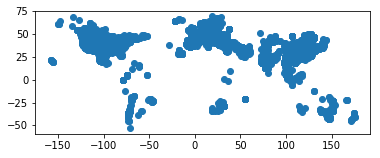

In [8]:
geoDF.plot()

### Clean up the dataframe

In [9]:
for i in range(geoDF.shape[0]):
    try:
        geoDF.loc[i,'aqi'] = int(geoDF.loc[i,'aqi'])
    except Exception as e:
        geoDF.loc[i,'aqi'] = np.nan
geoDF['aqi'].isnull().sum()

94

In [10]:
geoDF = geoDF.dropna()
geoDF = geoDF.reset_index()
geoDF = geoDF.drop(columns=['index'])
geoDF

id                                            station  \
0     10582  Doe Unviversity, Karaj, Alborz, Iran (البرز کر...   
1      5986            Edinburgh Salamander St, United Kingdom   
2        63                     Eisenhower Park, New York, USA   
3      5990                      Falkirk Haggs, United Kingdom   
4      5983             Edinburgh Glasgow Road, United Kingdom   
5     11605  Karimi, Mashhad, Khorasan  Razavi, Iran (خراسا...   
6      5989             Falkirk Grangemouth MC, United Kingdom   
7      5985         Edinburgh Queensferry Road, United Kingdom   
8     10648  Rigan, rigan, Kerman, Iran (كرمان شهرستان ریگا...   
9     10580  Eshtehard, Eshtehard, Alborz, Iran (البرز اشته...   
10     5309                                 Moscow, Idaho, USA   
11     5315                                 Salmon, Idaho, USA   
12     5996          Glasgow Abercromby Street, United Kingdom   
13     5991         Falkirk West Bridge Street, United Kingdom   
14     3390  London Hillingdon Harmondsworth Os, United Kin...   
15     6340                   Edinburgh Currie, United Kingdom   
16     6371                      Vittel, Basses Vosges, France   
17    11251  Karaj(metro), Karaj, Alborz, Iran (البرز کرج م...   
18    11252  Farhangsara, Karaj, Alborz, Iran (البرز کرج فر...   
19     6339  East Lothian Musselburgh N High St, United Kin...   
20     8924   V Glamorgan Windsor Road Penarth, United Kingdom   
21     5269                                Pahala, Hawaii, USA   
22      140              Beacon Hill, Seattle, Washington, USA   
23     5272                                 Kihei, Hawaii, USA   
24    11645  Samazghand, Mashhad, Khorasan  Razavi, Iran (خ...   
25    11604  Mofateh, Mashhad, Khorasan  Razavi, Iran (خراس...   
26    11603  North Khayam, Mashhad, Khorasan  Razavi, Iran ...   
27    11601  Chaman, Mashhad, Khorasan  Razavi, Iran (خراسا...   
28    11600  Avini, Mashhad, Khorasan  Razavi, Iran (خراسان...   
29    11599  Elahiyeh, Mashhad, Khorasan  Razavi, Iran (خرا...   
...     ...                                                ...   
8852  10722                      Riverina LLS Wagga, Australia   
8853  11528  Nakamuraminami, Tsuchiura-shi, Ibaraki-ken, Ja...   
8854  10720                      Murray LLS Kyalite, Australia   
8855  11487                  Hwacheongun, Gangwon, South Korea   
8856  11486                Jeongseon-eup, Gangwon, South Korea   
8857  10721                        Riverina LLS Hay, Australia   
8858  11491                   Yanggu-eup, Gangwon, South Korea   
8859  11489                    Taebaeksi, Gangwon, South Korea   
8860  11485                 Yeongwol-eup, Gangwon, South Korea   
8861  11492                  Yangyanggun, Gangwon, South Korea   
8862  11484               Janghowon-eup, Gyeonggi, South Korea   
8863  11493        Sokchosi( Geumhodong), Gangwon, South Korea   
8864  10719                  Central West LLS Dubbo, Australia   
8865   8521                     Wairarapa College, New Zealand   
8866   9098                              Rangiora, New Zealand   
8867   9100                             Geraldine, New Zealand   
8868   9095                             St Albans, New Zealand   
8869   9103                       Waimate Kennedy, New Zealand   
8870   8522                            Birch Lane, New Zealand   
8871   8520             Upper Hutt At Savage Park, New Zealand   
8872   8524                        Chanel College, New Zealand   
8873   9096                              Woolston, New Zealand   
8874   9097                               Kaiapoi, New Zealand   
8875   9101                   Timaru Anzac Square, New Zealand   
8876   8525                             Willis St, New Zealand   
8877   9304                    Takapuna, Auckland, New Zealand   
8878   9303                     Penrose, Auckland, New Zealand   
8879   9301                   Glen Eden, Auckland, New Zealand   
8880   9302                   Patumahoe, Auckland

### Merge with countries geojson file

In [11]:
countries = gpd.read_file("countries.geo.json")
countries

id                                 name  \
0    AFG                          Afghanistan   
1    AGO                               Angola   
2    ALB                              Albania   
3    ARE                 United Arab Emirates   
4    ARG                            Argentina   
5    ARM                              Armenia   
6    ATA                           Antarctica   
7    ATF  French Southern and Antarctic Lands   
8    AUS                            Australia   
9    AUT                              Austria   
10   AZE                           Azerbaijan   
11   BDI                              Burundi   
12   BEL                              Belgium   
13   BEN                                Benin   
14   BFA                         Burkina Faso   
15   BGD                           Bangladesh   
16   BGR                             Bulgaria   
17   BHS                          The Bahamas   
18   BIH               Bosnia and Herzegovina   
19   BLR                              Belarus   
20   BLZ                               Belize   
21   BMU                              Bermuda   
22   BOL                              Bolivia   
23   BRA                               Brazil   
24   BRN                               Brunei   
25   BTN                               Bhutan   
26   BWA                             Botswana   
27   CAF             Central African Republic   
28   CAN                               Canada   
29   CHE                          Switzerland   
..   ...                                  ...   
150  SUR                             Suriname   
151  SVK                             Slovakia   
152  SVN                             Slovenia   
153  SWE                               Sweden   
154  SWZ                            Swaziland   
155  SYR                                Syria   
156  TCD                                 Chad   
157  TGO                                 Togo   
158  THA                             Thailand   
159  TJK                           Tajikistan   
160  TKM                         Turkmenistan   
161  TLS                           East Timor   
162  TTO                  Trinidad and Tobago   
163  TUN                              Tunisia   
164  TUR                               Turkey   
165  TWN                               Taiwan   
166  TZA          United Republic of Tanzania   
167  UGA                               Uganda   
168  UKR                              Ukraine   
169  URY                              Uruguay   
170  USA             United States of America   
171  UZB                           Uzbekistan   
172  VEN                            Venezuela   
173  VNM                              Vietnam   
174  VUT                              Vanuatu   
175  PSE                            West Bank   
176  YEM                                Yemen   
177  ZAF                         South Africa   
178  ZMB                               Zambia   
179  ZWE                             Zimbabwe   

                                              geometry  
0    POLYGON ((61.210817 35.650072, 62.230651 35.27...  
1    (POLYGON ((16.326528 -5.87747, 16.57318 -6.622...  
2    POLYGON ((20.590247 41.855404, 20.463175 41.51...  
3    POLYGON ((51.579519 24.245497, 51.757441 24.29...  
4    (POLYGON ((-65.5 -55.2, -66.45 -55.25, -66.959...  
5    POLYGON ((43.582746 41.092143, 44.97248 41.248...  
6    (POLYGON ((-59.572095 -80.04017899999999, -59....  
7    POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525...  
8    (POLYGON ((145.397978 -40.792549, 146.364121 -...  
9    POLYGON ((16.979667 48.123497, 16.903754 47.71...  
10   (POLYGON ((45.001987 39.740004, 45.298145 39.4...  
11   POLYGON ((29.339998 -4.499983, 29.276384 -3.29...  
12   POLYGON ((3.314971 51.345781, 4.047071 51.2672...  
13   POLYGON ((2.691702 6.258817, 1.865241 6.142158...  
14   POLYGON ((-2.827496 9.642461000000001, -3.5118...  
15   POLYGON ((92.672721 22.041239, 92.652257000000... 

In [12]:
api_Coun = gpd.sjoin(geoDF, countries, how='left', op='within')
api_Coun

id_left                                            station  \
0       10582  Doe Unviversity, Karaj, Alborz, Iran (البرز کر...   
1        5986            Edinburgh Salamander St, United Kingdom   
2          63                     Eisenhower Park, New York, USA   
3        5990                      Falkirk Haggs, United Kingdom   
4        5983             Edinburgh Glasgow Road, United Kingdom   
5       11605  Karimi, Mashhad, Khorasan  Razavi, Iran (خراسا...   
6        5989             Falkirk Grangemouth MC, United Kingdom   
7        5985         Edinburgh Queensferry Road, United Kingdom   
8       10648  Rigan, rigan, Kerman, Iran (كرمان شهرستان ریگا...   
9       10580  Eshtehard, Eshtehard, Alborz, Iran (البرز اشته...   
10       5309                                 Moscow, Idaho, USA   
11       5315                                 Salmon, Idaho, USA   
12       5996          Glasgow Abercromby Street, United Kingdom   
13       5991         Falkirk West Bridge Street, United Kingdom   
14       3390  London Hillingdon Harmondsworth Os, United Kin...   
15       6340                   Edinburgh Currie, United Kingdom   
16       6371                      Vittel, Basses Vosges, France   
17      11251  Karaj(metro), Karaj, Alborz, Iran (البرز کرج م...   
18      11252  Farhangsara, Karaj, Alborz, Iran (البرز کرج فر...   
19       6339  East Lothian Musselburgh N High St, United Kin...   
20       8924   V Glamorgan Windsor Road Penarth, United Kingdom   
21       5269                                Pahala, Hawaii, USA   
22        140              Beacon Hill, Seattle, Washington, USA   
23       5272                                 Kihei, Hawaii, USA   
24      11645  Samazghand, Mashhad, Khorasan  Razavi, Iran (خ...   
25      11604  Mofateh, Mashhad, Khorasan  Razavi, Iran (خراس...   
26      11603  North Khayam, Mashhad, Khorasan  Razavi, Iran ...   
27      11601  Chaman, Mashhad, Khorasan  Razavi, Iran (خراسا...   
28      11600  Avini, Mashhad, Khorasan  Razavi, Iran (خراسان...   
29      11599  Elahiyeh, Mashhad, Khorasan  Razavi, Iran (خرا...   
...       ...                                                ...   
8852    10722                      Riverina LLS Wagga, Australia   
8853    11528  Nakamuraminami, Tsuchiura-shi, Ibaraki-ken, Ja...   
8854    10720                      Murray LLS Kyalite, Australia   
8855    11487                  Hwacheongun, Gangwon, South Korea   
8856    11486                Jeongseon-eup, Gangwon, South Korea   
8857    10721                        Riverina LLS Hay, Australia   
8858    11491                   Yanggu-eup, Gangwon, South Korea   
8859    11489                    Taebaeksi, Gangwon, South Korea   
8860    11485                 Yeongwol-eup, Gangwon, South Korea   
8861    11492                  Yangyanggun, Gangwon, South Korea   
8862    11484               Janghowon-eup, Gyeonggi, South Korea   
8863    11493        Sokchosi( Geumhodong), Gangwon, South Korea   
8864    10719                  Central West LLS Dubbo, Australia   
8865     8521                     Wairarapa College, New Zealand   
8866     9098                              Rangiora, New Zealand   
8867     9100                             Geraldine, New Zealand   
8868     9095                             St Albans, New Zealand   
8869     9103                       Waimate Kennedy, New Zealand   
8870     8522                            Birch Lane, New Zealand   
8871     8520             Upper Hutt At Savage Park, New Zealand   
8872     8524                        Chanel College, New Zealand   
8873     9096                              Woolston, New Zealand   
8874     9097                               Kaiapoi, New Zealand   
8875     9101                   Timaru Anzac Square, New Zealand   
8876     8525                             Willis St, New Zealand   
8877     9304                    Takapuna, Auckland, New Zealand   
8878     9303                     Penrose, Auckland, New Zeala

### Add properties to geojson data

In [13]:
industry = pd.read_csv("industryPercentage_merged.csv")
industry

Country  Agriculture  Industry  Services   q_vals
0                  Afghanistan          24.0      21.0       55.0       1
1                      Albania          21.6      14.9       63.5       1
2                       Algeria         13.1      38.7       48.2       3
3               American Samoa          27.4      12.4       60.2       1
4                      Andorra          14.0      79.0        6.0       3
5                       Angola          10.2      61.4       28.4       3
6                     Anguilla           2.3      21.0       76.6       1
7          Antigua and Barbuda           2.2      17.8       80.0       1
8                     Argentina         11.4      30.2       58.4       3
9                      Armenia          19.6      29.1       51.3       2
10                       Aruba           0.4      33.3       66.3       3
11                   Australia           3.6      28.2       68.2       2
12                      Austria          1.5      29.4       69.1       2
13                  Azerbaijan           5.5      62.1       32.4       3
14                Bahamas, The           2.2       6.5       91.3       1
15                     Bahrain           0.4      63.6       36.0       3
16                   Bangladesh         18.4      28.6       53.0       2
17                    Barbados           3.2      13.9       82.9       1
18                     Belarus           9.4      45.9       44.7       3
19                      Belgium          0.7      21.7       77.6       2
20                      Belize           9.7      19.8       70.5       1
21                       Benin          36.0       6.4       57.6       1
22                     Bermuda           0.7       7.0       92.2       1
23                      Bhutan          16.7      45.4       37.9       3
24                      Bolivia         10.0      40.0       50.0       3
25       Bosnia and Herzegovina          8.3      26.3       65.4       2
26                    Botswana           2.1      45.0       52.9       3
27                       Brazil          5.5      27.5       67.0       2
28      British Virgin Islands           1.0      11.9       87.2       1
29                       Brunei          0.8      66.7       32.5       3
..                          ...          ...       ...        ...     ...
192                      Syria          16.9      27.4       55.7       2
193                      Taiwan          1.3      32.0       66.9       3
194                 Tajikistan          21.4      21.7       56.8       2
195                   Tanzania          27.8      24.2       48.0       2
196                    Thailand         13.3      34.0       52.7       3
197                Timor-Leste          26.5      17.8       55.6       1
198                       Togo          46.0      23.0       31.0       2
199                      Tonga          20.8      18.1       61.1       1
200        Trinidad and Tobago           0.3      58.4       41.3       3
201                    Tunisia          10.6      34.6       54.8       3
202                      Turkey          9.3      28.1       62.6       2
203               Turkmenistan           7.9      24.5       67.6       2
204   Turks and Caicos Islands           1.0      24.2       74.8       2
205                     Tuvalu          16.6      27.2       56.2       2
206                      Uganda         22.0      25.4       52.6       2
207                     Ukraine          9.4      34.4       56.2       3
208        United Arab Emirates          0.8      53.9       45.3       3
209              United Kingdom          0.7      21.4       77.8       2
210    United States of America          1.2      19.2       79.6       1
211                    Uruguay           9.4      21.7       68.9       2
212                 Uzbekistan          21.9      37.7       40.3       3
213                    Vanuatu          21.2      10.4       68.4       1
214                  Venezue

In [14]:
for i in range(industry.shape[0]):
    industry.loc[i,'Country'] = industry.loc[i,'Country'].strip()
industry['Country'].value_counts().sort_values(ascending=False)

Aruba                       1
Bahamas, The                1
Senegal                     1
Vietnam                     1
Guernsey                    1
Chad                        1
Bosnia and Herzegovina      1
Central African Republic    1
Malta                       1
Benin                       1
Cayman Islands              1
Ghana                       1
Korea, North                1
Bolivia                     1
Czech Republic              1
Eritrea                     1
Sint Maarten                1
Guatemala                   1
Iran                        1
French Polynesia            1
American Samoa              1
Bermuda                     1
United States of America    1
United Kingdom              1
Turkey                      1
Luxembourg                  1
Uganda                      1
Marshall Islands            1
Botswana                    1
British Virgin Islands      1
                           ..
Tonga                       1
Cote d'Ivoire               1
Tanzania  

In [15]:
newDF = api_Coun.merge(industry, how='inner', left_on='name', right_on='Country', suffixes=('', '_2'))
newDF

id_left                                            station  \
0       10582  Doe Unviversity, Karaj, Alborz, Iran (البرز کر...   
1       11605  Karimi, Mashhad, Khorasan  Razavi, Iran (خراسا...   
2       10648  Rigan, rigan, Kerman, Iran (كرمان شهرستان ریگا...   
3       10580  Eshtehard, Eshtehard, Alborz, Iran (البرز اشته...   
4       11251  Karaj(metro), Karaj, Alborz, Iran (البرز کرج م...   
5       11252  Farhangsara, Karaj, Alborz, Iran (البرز کرج فر...   
6       11645  Samazghand, Mashhad, Khorasan  Razavi, Iran (خ...   
7       11604  Mofateh, Mashhad, Khorasan  Razavi, Iran (خراس...   
8       11603  North Khayam, Mashhad, Khorasan  Razavi, Iran ...   
9       11601  Chaman, Mashhad, Khorasan  Razavi, Iran (خراسا...   
10      11600  Avini, Mashhad, Khorasan  Razavi, Iran (خراسان...   
11      11599  Elahiyeh, Mashhad, Khorasan  Razavi, Iran (خرا...   
12      11598  Sarafrazan, Mashhad, Khorasan  Razavi, Iran (خ...   
13      10623  Najaf Abad, NajafAbad, Isfahan, Iran (اصفهان ن...   
14      10796  Azarbaijan Square, Tabriz, AZ-East, Iran (آذرب...   
15      11247  Hakim Nezam, Tabriz, AZ-East, Iran (آذربایجان ...   
16      11236  Marmar Hotel, Tabriz, AZ-East, Iran (آذربایجان...   
17      10790  Rah Ahan, Tabriz, AZ-East, Iran (آذربایجان شرق...   
18      11231  Borazjan, Dashtestan, Bushehr, Iran (بوشهر دشت...   
19      10602  Shush, Shush, Khouzestan, Iran (خوزستان شوش شو...   
20      10597  Eyvan, Eyvan, Ilam, Iran (ایلام ایوان ایوان, I...   
21      11596  ZarinShar, lenjan, Isfahan, Iran (اصفهان لنجان...   
22      11242  shahin shahr, Shahin Shahr, Isfahan, Iran (اصف...   
23      11246  Khomeini Shahr, Khomeini Shahr, Isfahan, Iran ...   
24      10658  Sejzi, Sejzi, Isfahan, Iran (اصفهان سجزی سگزی,...   
25      10657  Ostandari_Isfahan, Isfahan, Isfahan, Iran (اصف...   
26      10656  Mobareke, Mobareke, Isfahan, Iran (اصفهان مبار...   
27      10619  kharazi, Isfahan, Isfahan, Iran (اصفهان اصفهان...   
28      10620  Roudaki, Isfahan, Isfahan, Iran (اصفهان اصفهان...   
29      10621  Khajou, Isfahan, Isfahan, Iran (اصفهان اصفهان ...   
...       ...                                                ...   
8062    10723                     Western LLS Buronga, Australia   
8063    10722                      Riverina LLS Wagga, Australia   
8064    10720                      Murray LLS Kyalite, Australia   
8065    10721                        Riverina LLS Hay, Australia   
8066    10719                  Central West LLS Dubbo, Australia   
8067     3152                           Montravel, New Caledonia   
8068     3156                          Foret Nord, New Caledonia   
8069     3151                            Logicoop, New Caledonia   
8070    11565  Vientiane National University, Laos (ວຽງຈັນ, ມ...   
8071    11702     Vientiane University of Health Science 2, Laos   
8072    11220                        Phnom Penh CDB-01, Cambodia   
8073     9099                             Ashburton, New Zealand   
8074     8523              Wainuiomata Bowling Club, New Zealand   
8075     8521                     Wairarapa College, New Zealand   
8076     9098                              Rangiora, New Zealand   
8077     9100                             Geraldine, New Zealand   
8078     9095                             St Albans, New Zealand   
8079     9103                       Waimate Kennedy, New Zealand   
8080     8522                            Birch Lane, New Zealand   
8081     8520             Upper Hutt At Savage Park, New Zealand   
8082     8524                        Chanel College, New Zealand   
8083     9096                              Woolston, New Zealand   
8084     9097                               Kaiapoi, New Zealand   
8085     9101                   Timaru Anzac Square, New Zealand   
8086     8525                             Willis St, New Zealand   
8087     9304                    Takapuna, Auckland, New Zealand   
8088     9303                     Penrose, Auckland, New Zeala

In [16]:
newDF = newDF.drop(columns=['index_right','id_right','name','Agriculture','Services '])
newDF = newDF.rename(columns = {'id_left':'id','Country':'country','Industry':'industry'})
newDF

id                                            station  \
0     10582  Doe Unviversity, Karaj, Alborz, Iran (البرز کر...   
1     11605  Karimi, Mashhad, Khorasan  Razavi, Iran (خراسا...   
2     10648  Rigan, rigan, Kerman, Iran (كرمان شهرستان ریگا...   
3     10580  Eshtehard, Eshtehard, Alborz, Iran (البرز اشته...   
4     11251  Karaj(metro), Karaj, Alborz, Iran (البرز کرج م...   
5     11252  Farhangsara, Karaj, Alborz, Iran (البرز کرج فر...   
6     11645  Samazghand, Mashhad, Khorasan  Razavi, Iran (خ...   
7     11604  Mofateh, Mashhad, Khorasan  Razavi, Iran (خراس...   
8     11603  North Khayam, Mashhad, Khorasan  Razavi, Iran ...   
9     11601  Chaman, Mashhad, Khorasan  Razavi, Iran (خراسا...   
10    11600  Avini, Mashhad, Khorasan  Razavi, Iran (خراسان...   
11    11599  Elahiyeh, Mashhad, Khorasan  Razavi, Iran (خرا...   
12    11598  Sarafrazan, Mashhad, Khorasan  Razavi, Iran (خ...   
13    10623  Najaf Abad, NajafAbad, Isfahan, Iran (اصفهان ن...   
14    10796  Azarbaijan Square, Tabriz, AZ-East, Iran (آذرب...   
15    11247  Hakim Nezam, Tabriz, AZ-East, Iran (آذربایجان ...   
16    11236  Marmar Hotel, Tabriz, AZ-East, Iran (آذربایجان...   
17    10790  Rah Ahan, Tabriz, AZ-East, Iran (آذربایجان شرق...   
18    11231  Borazjan, Dashtestan, Bushehr, Iran (بوشهر دشت...   
19    10602  Shush, Shush, Khouzestan, Iran (خوزستان شوش شو...   
20    10597  Eyvan, Eyvan, Ilam, Iran (ایلام ایوان ایوان, I...   
21    11596  ZarinShar, lenjan, Isfahan, Iran (اصفهان لنجان...   
22    11242  shahin shahr, Shahin Shahr, Isfahan, Iran (اصف...   
23    11246  Khomeini Shahr, Khomeini Shahr, Isfahan, Iran ...   
24    10658  Sejzi, Sejzi, Isfahan, Iran (اصفهان سجزی سگزی,...   
25    10657  Ostandari_Isfahan, Isfahan, Isfahan, Iran (اصف...   
26    10656  Mobareke, Mobareke, Isfahan, Iran (اصفهان مبار...   
27    10619  kharazi, Isfahan, Isfahan, Iran (اصفهان اصفهان...   
28    10620  Roudaki, Isfahan, Isfahan, Iran (اصفهان اصفهان...   
29    10621  Khajou, Isfahan, Isfahan, Iran (اصفهان اصفهان ...   
...     ...                                                ...   
8062  10723                     Western LLS Buronga, Australia   
8063  10722                      Riverina LLS Wagga, Australia   
8064  10720                      Murray LLS Kyalite, Australia   
8065  10721                        Riverina LLS Hay, Australia   
8066  10719                  Central West LLS Dubbo, Australia   
8067   3152                           Montravel, New Caledonia   
8068   3156                          Foret Nord, New Caledonia   
8069   3151                            Logicoop, New Caledonia   
8070  11565  Vientiane National University, Laos (ວຽງຈັນ, ມ...   
8071  11702     Vientiane University of Health Science 2, Laos   
8072  11220                        Phnom Penh CDB-01, Cambodia   
8073   9099                             Ashburton, New Zealand   
8074   8523              Wainuiomata Bowling Club, New Zealand   
8075   8521                     Wairarapa College, New Zealand   
8076   9098                              Rangiora, New Zealand   
8077   9100                             Geraldine, New Zealand   
8078   9095                             St Albans, New Zealand   
8079   9103                       Waimate Kennedy, New Zealand   
8080   8522                            Birch Lane, New Zealand   
8081   8520             Upper Hutt At Savage Park, New Zealand   
8082   8524                        Chanel College, New Zealand   
8083   9096                              Woolston, New Zealand   
8084   9097                               Kaiapoi, New Zealand   
8085   9101                   Timaru Anzac Square, New Zealand   
8086   8525                             Willis St, New Zealand   
8087   9304                    Takapuna, Auckland, New Zealand   
8088   9303                     Penrose, Auckland, New Zealand   
8089   9301                   Glen Eden, Auckland, New Zealand   
8090   9302                   Patumahoe, Auckland

In [26]:
newDF.dtypes

id            int64
station      object
time         object
aqi          object
pm10        float64
pm25        float64
no2         float64
o3          float64
so2         float64
co          float64
geometry     object
country      object
industry    float64
q_vals        int64
dtype: object

In [43]:
type(newDF.loc[1,'q_vals'])

numpy.int64

In [44]:
# initialise a features list for the geojson object
features = []
for i in range(newDF.shape[0]):
    features.append(geojson.Feature(geometry=newDF.loc[i,'geometry'], 
                            properties={"id": int(newDF.loc[i,'id']),
                                        "station": newDF.loc[i,'station'],
                                        "time": newDF.loc[i,'time'],
                                        "aqi": newDF.loc[i,'aqi'],
                                        "pm10": newDF.loc[i,'pm10'],
                                        "pm25": newDF.loc[i,'pm25'],
                                        "no2": newDF.loc[i,'no2'],
                                        "o3": newDF.loc[i,'o3'],
                                        "so2": newDF.loc[i,'so2'],
                                        "co": newDF.loc[i,'co'],
                                        "country": newDF.loc[i,'country'],
                                        "industry": newDF.loc[i,'industry'],
                                        "q_vals": int(newDF.loc[i,'q_vals'])}))
geojson_merged = geojson.FeatureCollection(features)
geojson_merged

{"features": [{"geometry": {"coordinates": [50.9959656, 35.8354645], "type": "Point"}, "properties": {"aqi": 22, "co": 36.0, "country": "Iran", "id": 10582, "industry": 37.7, "no2": -1.0, "o3": 50.0, "pm10": 22.0, "pm25": -1.0, "q_vals": 3, "so2": 80.0, "station": "Doe Unviversity, Karaj, Alborz, Iran (\u0627\u0644\u0628\u0631\u0632 \u06a9\u0631\u062c \u062f\u0627\u0646\u0634\u06af\u0627\u0647 \u0645\u062d\u06cc\u0637 \u0632\u06cc\u0633\u062a \u06a9\u0631\u062c, Iran)", "time": "2019-05-19T03:00:00"}, "type": "Feature"}, {"geometry": {"coordinates": [59.5949, 36.3151], "type": "Point"}, "properties": {"aqi": 32, "co": 25.0, "country": "Iran", "id": 11605, "industry": 37.7, "no2": -1.0, "o3": -1.0, "pm10": 11.0, "pm25": 32.0, "q_vals": 3, "so2": -1.0, "station": "Karimi, Mashhad, Khorasan  Razavi, Iran (\u062e\u0631\u0627\u0633\u0627\u0646 \u0631\u0636\u0648\u064a  \u0645\u0634\u0647\u062f \u06a9\u0631\u06cc\u0645\u06cc, Iran)", "time": "2019-05-19T04:00:00"}, "type": "Feature"}, {"geom

In [50]:
import pandas as pd
import numpy as np
import json
import geojson
import geopandas as gpd
from shapely.geometry import Point
import difflib
import string
import requests
from requests.exceptions import ConnectionError
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import re
from apscheduler.schedulers.background import BackgroundScheduler
from datetime import datetime
from github import Github

# simple function to request HTML text
# require requests & fake_useragent package
def getHTML(url): 
    try:
        ua = UserAgent().random
        header = {'user-agent':ua}
        r = requests.get(url, headers = header, timeout=30)
        r.raise_for_status() # raise error if r.status_code != 200
        r.encoding = r.apparent_encoding
        return r.text
    except ConnectionError:
        pass
    except Exception as e:
        return e

# function to get the NAMEs of the latest files in Github repo
def getFILENAMEs(url,matchstr):
    try:
#         global fileNAMEs
        html = getHTML(url)
        soup = BeautifulSoup(html,'html.parser')
        # initialise a list to store the filenames
        filenames = []
        for a in soup.find_all('a'):
            text = a.get_text()
            if re.match(matchstr,text) is not None:
                filenames.append(text)
        return filenames
    except Exception as e:
        print(e)
        return

In [20]:
# initialise the parameters
url = 'https://github.com/CASA-DV-Group3/AirQuality-0/tree/lyu/assets/data/stationData'
matchstr = 'STATIONdata'
filenames = getFILENAMEs(url,matchstr)
filenames

['STATIONdata1904.geojson',
 'STATIONdata1905.geojson',
 'STATIONdata1906.geojson',
 'STATIONdata1907.geojson',
 'STATIONdata1908.geojson',
 'STATIONdata1909.geojson',
 'STATIONdata1910.geojson',
 'STATIONdata1912.geojson',
 'STATIONdata1914.geojson',
 'STATIONdata1915.geojson',
 'STATIONdata1916.geojson',
 'STATIONdata1920.geojson',
 'STATIONdata1921.geojson',
 'STATIONdata2000.geojson',
 'STATIONdata2001.geojson',
 'STATIONdata2002.geojson',
 'STATIONdata2003.geojson',
 'STATIONdata2004.geojson',
 'STATIONdata2005.geojson',
 'STATIONdata2006.geojson',
 'STATIONdata2007.geojson',
 'STATIONdata2008.geojson',
 'STATIONdata2009.geojson',
 'STATIONdata2010.geojson']

In [45]:
filenames[0].split('.')

['STATIONdata1904', 'geojson']

In [51]:
# load geojson file as object:
file_path = 'https://raw.githubusercontent.com/CASA-DV-Group3/AirQuality-0/lyu/assets/data/stationData/'
file_url = file_path + filenames[0]
data = requests.get(file_url)
data = geojson.loads(data.text)
# load geojson file as GeoDataframe
geoDF = gpd.read_file(file_url)
# flip the order of coordinates
for j in range(geoDF.shape[0]):
    try:
        old_coords = data.features[j].geometry['coordinates']
        geoDF.loc[j,'geometry'] = Point(old_coords[1],old_coords[0])
    except Exception as e:
        geoDF.loc[j,'geometry'] = np.nan
# clean up the dataframe
for j in range(geoDF.shape[0]):
    try:
        geoDF.loc[j,'aqi'] = int(geoDF.loc[j,'aqi'])
    except Exception as e:
        geoDF.loc[j,'aqi'] = np.nan
geoDF = geoDF.dropna()
geoDF = geoDF.reset_index()
geoDF = geoDF.drop(columns=['index'])
# merge api data with country name
countries = gpd.read_file("countries.geo.json")
api_Coun = gpd.sjoin(geoDF, countries, how='left', op='within')
# merge api_country data with extra properties data
industry = pd.read_csv("industryPercentage_merged.csv")
for j in range(industry.shape[0]):
    industry.loc[j,'Country'] = industry.loc[j,'Country'].strip()
newDF = api_Coun.merge(industry, how='inner', left_on='name', right_on='Country', suffixes=('', '_2'))
# clean up the dataframe
newDF = newDF.drop(columns=['index_right','id_right','name','Agriculture','Services '])
newDF = newDF.rename(columns = {'id_left':'id','Country':'country','Industry':'industry'})
# convert the dataframe to geojson
# initialise a features list for the geojson object
features = []
for j in range(newDF.shape[0]):
    features.append(geojson.Feature(geometry=newDF.loc[j,'geometry'], 
                                        properties={"id": int(newDF.loc[j,'id']),
                                                    "station": newDF.loc[j,'station'],
                                                    "time": newDF.loc[j,'time'],
                                                    "aqi": newDF.loc[j,'aqi'],
                                                    "pm10": newDF.loc[j,'pm10'],
                                                    "pm25": newDF.loc[j,'pm25'],
                                                    "no2": newDF.loc[j,'no2'],
                                                    "o3": newDF.loc[j,'o3'],
                                                    "so2": newDF.loc[j,'so2'],
                                                    "co": newDF.loc[j,'co'],
                                                    "country": newDF.loc[j,'country'],
                                                    "industry": newDF.loc[j,'industry'],
                                                    "q_vals": int(newDF.loc[j,'q_vals'])}))
geojson_merged = geojson.FeatureCollection(features)
# save to local file
filename = filenames[0].split('.')[0] + '_merged.geojson'
with open(filename, 'w') as f:
    geojson.dump(geojson_merged, f)
# upload to Github
# First create a Github instance:
g = Github("dde59fd520aa7102e518a9b0993e9bca2f8122a2")
# Creat a repository object:
repo = g.get_repo("CASA-DV-Group3/AirQuality-0")
# Create file with string contents:
path = 'assets/data/stationData/'+filename
repo.create_file(path, "merged station data", json.dumps(geojson_merged), branch="lyu")
print(filename +' - '+'success')

STATIONdata1904_merged.geojson - success


In [60]:
import pandas as pd
import numpy as np
import json
import geojson
import geopandas as gpd
from shapely.geometry import Point
import difflib
import string
import requests
from requests.exceptions import ConnectionError
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import re
from github import Github

# simple function to request HTML text
# require requests & fake_useragent package
def getHTML(url): 
    try:
        ua = UserAgent().random
        header = {'user-agent':ua}
        r = requests.get(url, headers = header, timeout=30)
        r.raise_for_status() # raise error if r.status_code != 200
        r.encoding = r.apparent_encoding
        return r.text
    except ConnectionError:
        pass
    except Exception as e:
        return e

# function to get the NAMEs of the latest files in Github repo
def getFILENAMEs(url,matchstr):
    try:
#         global fileNAMEs
        html = getHTML(url)
        soup = BeautifulSoup(html,'html.parser')
        # initialise a list to store the filenames
        filenames = []
        for a in soup.find_all('a'):
            text = a.get_text()
            if re.match(matchstr,text) is not None:
                filenames.append(text)
        return filenames
    except Exception as e:
        print(e)
        return

def geojsonMERGE():
    try:
        # initialise the parameters to get list of geojson filenames
        page_url = 'https://github.com/CASA-DV-Group3/AirQuality-0/tree/lyu/assets/data/stationData'
        matchstr = 'STATIONdata'
        filenames = getFILENAMEs(page_url,matchstr)
        # use for loop to update contents of each geojson files
        for i in range(42,len(filenames)):
            # load geojson file as object:
            file_path = 'https://raw.githubusercontent.com/CASA-DV-Group3/AirQuality-0/lyu/assets/data/stationData/'
            file_url = file_path + filenames[i]
            data = requests.get(file_url)
            data = geojson.loads(data.text)
            # load geojson file as GeoDataframe
            geoDF = gpd.read_file(file_url)
            # flip the order of coordinates
            for j in range(geoDF.shape[0]):
                try:
                    old_coords = data.features[j].geometry['coordinates']
                    geoDF.loc[j,'geometry'] = Point(old_coords[1],old_coords[0])
                except Exception as e:
                    geoDF.loc[j,'geometry'] = np.nan
            # clean up the dataframe
            for j in range(geoDF.shape[0]):
                try:
                    geoDF.loc[j,'aqi'] = int(geoDF.loc[j,'aqi'])
                except Exception as e:
                    geoDF.loc[j,'aqi'] = np.nan
            geoDF = geoDF.dropna()
            geoDF = geoDF.reset_index()
            geoDF = geoDF.drop(columns=['index'])
            # merge api data with country name
            countries = gpd.read_file("countries.geo.json")
            api_Coun = gpd.sjoin(geoDF, countries, how='left', op='within')
            # merge api_country data with extra properties data
            industry = pd.read_csv("industryPercentage_merged.csv")
            for j in range(industry.shape[0]):
                industry.loc[j,'Country'] = industry.loc[j,'Country'].strip()
            newDF = api_Coun.merge(industry, how='inner', left_on='name', right_on='Country', suffixes=('', '_2'))
            # clean up the dataframe
            newDF = newDF.drop(columns=['index_right','id_right','name','Agriculture','Services '])
            newDF = newDF.rename(columns = {'id_left':'id','Country':'country','Industry':'industry'})
            # convert the dataframe to geojson
            # initialise a features list for the geojson object
            features = []
            for j in range(newDF.shape[0]):
                features.append(geojson.Feature(geometry=newDF.loc[j,'geometry'], 
                                        properties={"id": int(newDF.loc[j,'id']),
                                                    "station": newDF.loc[j,'station'],
                                                    "time": newDF.loc[j,'time'],
                                                    "aqi": newDF.loc[j,'aqi'],
                                                    "pm10": newDF.loc[j,'pm10'],
                                                    "pm25": newDF.loc[j,'pm25'],
                                                    "no2": newDF.loc[j,'no2'],
                                                    "o3": newDF.loc[j,'o3'],
                                                    "so2": newDF.loc[j,'so2'],
                                                    "co": newDF.loc[j,'co'],
                                                    "country": newDF.loc[j,'country'],
                                                    "industry": newDF.loc[j,'industry'],
                                                    "q_vals": int(newDF.loc[j,'q_vals'])}))
            geojson_merged = geojson.FeatureCollection(features)
            # save to local file
            filename = filenames[i].split('.')[0] + '_merged.geojson'
            with open(filename, 'w') as f:
               geojson.dump(geojson_merged, f)
            # upload to Github
            # First create a Github instance:
            g = Github("dde59fd520aa7102e518a9b0993e9bca2f8122a2")
            # Creat a repository object:
            repo = g.get_repo("CASA-DV-Group3/AirQuality-0")
            # Create file with string contents:
            path = 'assets/data/stationData/'+filename
            repo.create_file(path, "merged station data", json.dumps(geojson_merged), branch="lyu")
            print(filename +' - '+'success')
        return
    except Exception as e:
        print(e)
        return

geojsonMERGE()

STATIONdata2008_merged.geojson - success
422 {'message': 'Invalid request.\n\n"sha" wasn\'t supplied.', 'documentation_url': 'https://developer.github.com/v3/repos/contents/#update-a-file'}
